In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential

In [ ]:
#WITH SEQUENTIAL
seq_model = Sequential([
Flatten(input_shape=(28,28)),
Dense(128, activation='relu'),
Dense(10, activation='softmax')
])

In [2]:
#FUNCTIONAL APIs
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

input = Input(shape=(28,28))   #DEFINE INPUT
x = Flatten()(input)                          #-->
x = Dense(128, activation='relu')(x)          #--> DEFINE INTERCONNECTED LAYERS ON THE INPUT
Preds = Dense(10, activation='softmax')(x)    #-->

func_model = Model(inputs=input, outputs=Preds)   #DEFINE MODEL

#### Merge Differents Layers





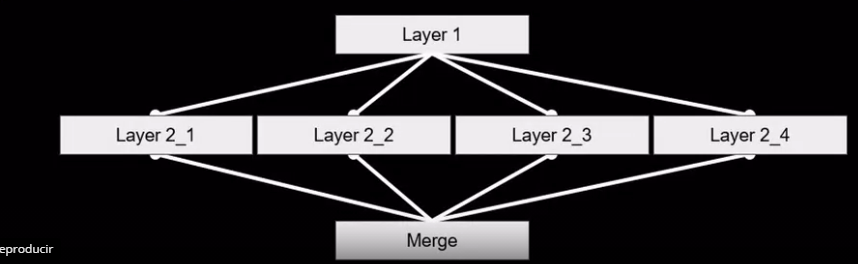

In [ ]:
#EXAMPLE STRUCTURE
from tensorflow.keras.layers import Concatenate

layer1 = Dense(32)
layer2_1 = Dense(32)(layer1)
layer2_2 = Dense(32)(layer1)
layer2_3 = Dense(32)(layer1)
layer2_4 = Dense(32)(layer1)
merge = Concatenate([layer2_1,layer2_2,layer2_3,layer2_4])

#### MULTIPLE OUTPUTS

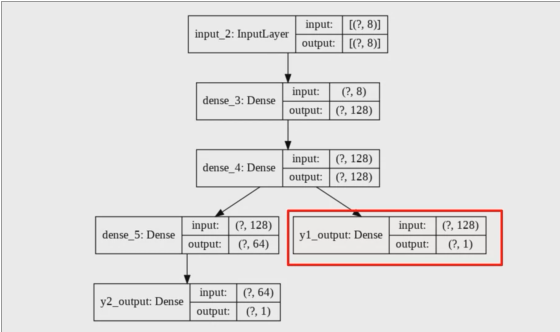

In [4]:
import pandas as pd
#TENEMOS 2 VARIABLES A PREDECIR
data = pd.read_excel('/content/drive/MyDrive/ENB2012_data.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [ ]:
def format_output(data):
  y1 = data.pop('Y1')
  y1  =np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)
  return y1, y2

#NO OLVIDAR LA NORMALIZACION QUE NO LA REALICE 

train_Y = format_output(train)
test_Y = format_output(test)

In [ ]:
input_layer = Input(shape=(len(data.columns), ))
Dense1 = Dense(128, activation='relu')(input_layer)
Dense2 = Dense(128, activation='relu')(Dense1)
y1_output = Dense(1, name='y1_output')(Dense2)
Dense3 = Dense(64, activation='relu')(Dense2)
y2_output = Dense(1, name='y2_output')(Dense3)

Model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
Model.compile(optimizer=optimizer, loss={
    'y1_output':'mse',
    'y2_output':'mse'
},metrics={
    'y1_output':tf.keras.metrics.RootMeanSquaredError(),
    'y2_output':tf.keras.metrics.RootMeanSquaredError()
})

In [ ]:
Model.fit(train,train_Y,epochs=60,batch_size=32, validation_data=(test,test_Y))

#### MULTIPLE INPUTS AND COMPARISION 

Estos modelos de multiples entradas tambien se usan para regresion, pero mas comun mente para comprar imagenes y ver si son parecidas mediante la metrica de distancia eucladiana

### CREATE LOSS FUNCTION PERSONALIZATE

In [ ]:
xs = np.array([-1.0,0.0,1.0,2.0,3.0,4.0], dtype=float)
ys = np.array([3.0,-1.0,1.0,3.0,5.0,7.0], dtype=float)

In [ ]:
#NO CREATE
model = Sequential([Dense(1, input_shape=([1]))])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs,ys, epochs=500, verbose=0)
print(model.predict([10.0]))

[[12.726155]]


In [ ]:
#CREATE A loss function
def my_huber_loss(y_true, y_pred):
  threshold=1
  error = y_true-y_pred
  is_small_error = tf.abs(error) <= threshold
  small_error_loss = tf.square(error)/2
  big_error_loss = threshold * (tf.abs(error)-(0.5*threshold))
  return tf.where(is_small_error, small_error_loss, big_error_loss)

In [ ]:
#CREATE
model = Sequential([Dense(1, input_shape=([1]))])
model.compile(optimizer='sgd', loss=my_huber_loss)
model.fit(xs,ys, epochs=5, verbose=0)
print(model.predict([10.0]))

[[16.112612]]


In [ ]:
#CREATE A LOSS FUNCTION WITH MODIFICABLE THRESHOLD

def my_huber_loss_with_threshold(threshold):
  def my_huber_loss(y_true, y_pred):
    error = y_true-y_pred
    is_small_error = tf.abs(error) <= threshold
    small_error_loss = tf.square(error)/2
    big_error_loss = threshold * (tf.abs(error)-(0.5*threshold))
    return tf.where(is_small_error, small_error_loss, big_error_loss)
  return my_huber_loss

In [ ]:
#CALL THE LOSS FUNCTION WITH DIFFERENT THRESHOLD
model.compile(optimizer='sgd', loss=my_huber_loss_with_threshold(theshold=1))